# 1. Functions, libraries and packages

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import kaggle

In [2]:
def dataframe_info(df: pd.DataFrame):
    """
    Generate a summary DataFrame containing metadata about the columns of the input DataFrame.

    Args:
        df (pd.DataFrame): The input DataFrame.

    Returns:
        pd.DataFrame: A summary DataFrame with the following columns:
            - Column_name: Name of each column.
            - Total records: Total number of records in each column.
            - Missing Values: Number of missing (NaN) values in each column.
            - Data type: Data type of each column.
            - Unique values: Number of unique values in each column.
    """
    df_summary = pd.DataFrame({
        'Column_name': df.columns,
        'Total records': [df[col].size for col in df.columns],
        'Missing Values': [df[col].isna().sum() for col in df.columns],
        'Data type': [df[col].dtype for col in df.columns],
        'Unique values': [df[col].nunique() for col in df.columns]
    })

    return df_summary

# 2. Data import

In [6]:
kaggle.api.authenticate()
kaggle.api.dataset_download_files('shubhambathwal/flight-price-prediction', path = './data', unzip = True)

Dataset URL: https://www.kaggle.com/datasets/shubhambathwal/flight-price-prediction


In [ ]:
df = pd.read_csv(r'/data/Clean_Dataset.csv')

In [8]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


# 3. EDA

In [9]:
dataframe_info(df)

,Column_name,Total records,Missing Values,Data type,Unique values
0,Unnamed: 0,300153,0,int64,300153
1,airline,300153,0,object,6
2,flight,300153,0,object,1561
3,source_city,300153,0,object,6
4,departure_time,300153,0,object,6
5,stops,300153,0,object,3
6,arrival_time,300153,0,object,6
7,destination_city,300153,0,object,6
8,class,300153,0,object,2
9,duration,300153,0,float64,476


In [ ]:
df.airline.value_counts()
#probably one-hot encode this column becase there is not a lot of unique values

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

In [ ]:
df.source_city.value_counts()
#probably one-hot encode this column becase there is not a lot of unique values

source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64

In [ ]:
df.destination_city.value_counts()
#probably one-hot encode this column becase there is not a lot of unique values

destination_city
Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: count, dtype: int64

In [ ]:
df.departure_time.value_counts()
#probably one-hot encode this column becase there is not a lot of unique values

departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: count, dtype: int64

In [ ]:
df.arrival_time.value_counts()
#probably one-hot encode this column becase there is not a lot of unique values

arrival_time
Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001
Name: count, dtype: int64

In [ ]:
df.stops.value_counts()
# if there are only 2 unique values, we can probably just use a binary encoding, but they are three unique values so we will use ordinal encoding


stops
one            250863
zero            36004
two_or_more     13286
Name: count, dtype: int64

In [ ]:
# not nan values
# a lot of object values to be converted to categorical
# Overall, the dataset is clean and ready for analysis

In [ ]:
df['class'].value_counts()
# Only two unique values, we can probably just use a binary encoding

class
Economy     206666
Business     93487
Name: count, dtype: int64

In [19]:
df.duration.describe()

count    300153.000000
mean         12.221021
std           7.191997
min           0.830000
25%           6.830000
50%          11.250000
75%          16.170000
max          49.830000
Name: duration, dtype: float64

<Axes: xlabel='duration', ylabel='Count'>

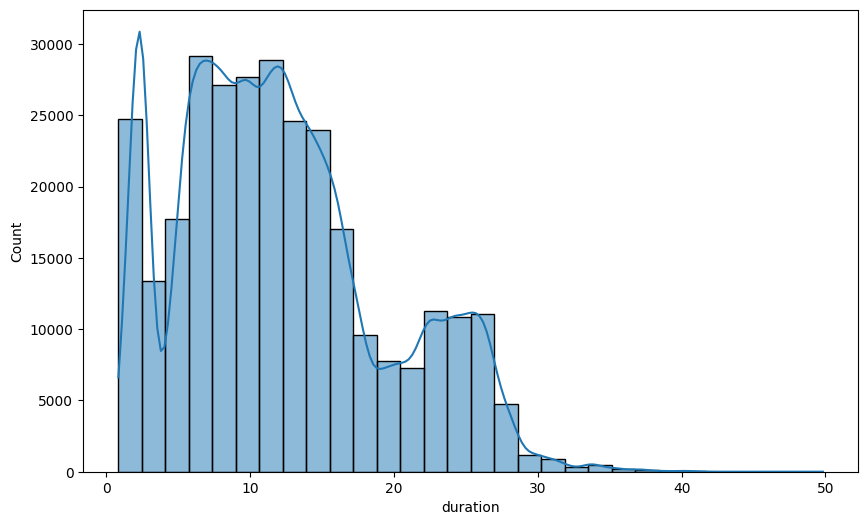

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['duration'], bins=30, kde=True)
# overall not necessary to create a categories (interval) for the duration, we can just use the float values

In [ ]:
#df.days_left is not necessary to encode becasue it is already a number

# 4. Preprocesing